# Life Expectency Data Analysis using Clustering

### (a) Life expectancy at birth is a measure of the average a living being is expected to live. It takes into account several demographic factors like gender, country, or year of birth.<br> (b) Every Country wants to increase the LE of its citizens. <br>(c) So, an accurate analysis is required to know the factors on which LE depends so that the countries can work upon them.

Features:<br>
1) Dataset is taken from Kaggle.<br>
  2) It is a dataset with approx. 2900 rows and 9 attributes.

# Importing libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [69]:
data=pd.read_csv('Who_data.csv')
WHO_data=pd.DataFrame(data)
WHO_data

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,BMI,Schooling,GDP,under-fivedeaths
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,19.1,10.1,584.259210,83
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,18.6,10.0,612.696514,86
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,18.1,9.9,631.744976,89
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,17.6,9.8,669.959000,93
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,17.2,9.5,63.537231,97
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,27.1,9.2,454.366654,42
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,26.7,9.5,453.351155,41
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,26.3,10.0,57.348340,40
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,25.9,9.8,548.587312,39


# Describing the dataset 

In [70]:
WHO_data.describe

<bound method NDFrame.describe of           Country  Year      Status  Lifeexpectancy  AdultMortality  \
0     Afghanistan  2015  Developing            65.0           263.0   
1     Afghanistan  2014  Developing            59.9           271.0   
2     Afghanistan  2013  Developing            59.9           268.0   
3     Afghanistan  2012  Developing            59.5           272.0   
4     Afghanistan  2011  Developing            59.2           275.0   
...           ...   ...         ...             ...             ...   
2933     Zimbabwe  2004  Developing            44.3           723.0   
2934     Zimbabwe  2003  Developing            44.5           715.0   
2935     Zimbabwe  2002  Developing            44.8            73.0   
2936     Zimbabwe  2001  Developing            45.3           686.0   
2937     Zimbabwe  2000  Developing            46.0           665.0   

      infantdeaths  Alcohol  percentageexpenditure   BMI  Schooling  \
0               62     0.01              7

# Checking data types

In [71]:
WHO_data.dtypes

Country                   object
Year                       int64
Status                    object
Lifeexpectancy           float64
AdultMortality           float64
infantdeaths               int64
Alcohol                  float64
percentageexpenditure    float64
BMI                      float64
Schooling                float64
GDP                      float64
under-fivedeaths           int64
dtype: object

In [72]:
WHO_data.shape

(2938, 12)

# Checking for null values

In [73]:
WHO_data.isnull().sum()

Country                    0
Year                       0
Status                     0
Lifeexpectancy            10
AdultMortality            10
infantdeaths               0
Alcohol                  194
percentageexpenditure      0
BMI                       34
Schooling                163
GDP                      448
under-fivedeaths           0
dtype: int64

# Dealing with null values

In [83]:
WHO_data['Lifeexpectancy'].fillna(method='ffill', inplace=True)
WHO_data['AdultMortality'].fillna(method='ffill', inplace=True)
WHO_data['Alcohol'].fillna(method='ffill', inplace=True)
WHO_data['BMI'].fillna(method='ffill', inplace=True)
WHO_data['Schooling'].fillna(method='ffill', inplace=True)
WHO_data['GDP'].fillna(method='ffill', inplace=True)

In [84]:
WHO_data.isnull().sum()

Country                  0
Year                     0
Status                   0
Lifeexpectancy           0
AdultMortality           0
infantdeaths             0
Alcohol                  0
percentageexpenditure    0
BMI                      0
Schooling                0
GDP                      0
under-fivedeaths         0
dtype: int64

In [85]:
df=WHO_data

# Analysing the correlation bt LE and other factors

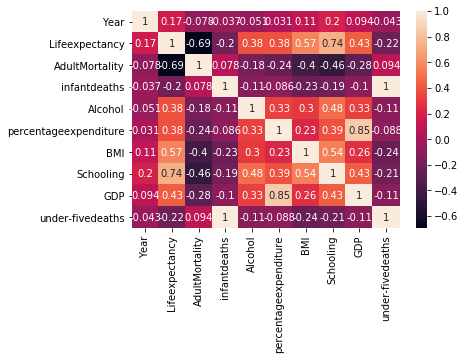

In [86]:
matrix=df.corr()
sns.heatmap(matrix,annot=True)
plt.show()

# Taking LE and Schooling for clustering

In [87]:
x=data.iloc[:,[3,9]].values
x

array([[65. , 10.1],
       [59.9, 10. ],
       [59.9,  9.9],
       ...,
       [44.8, 10. ],
       [45.3,  9.8],
       [46. ,  9.8]])

# Using elbow method to find number of clusters

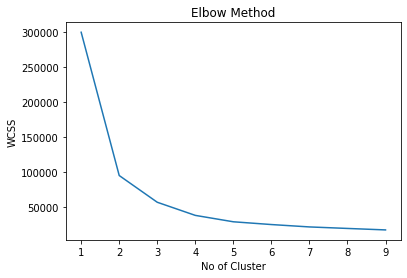

In [88]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel("No of Cluster")
plt.ylabel('WCSS')
plt.show()

### So here no of clusters are decided as 2

# Applying K-means clustering

In [89]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=30)
y_kmeans = kmeans.fit_predict(x)

In [90]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

# Making scatter-plot of clusters

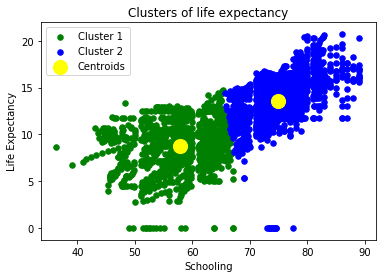

In [102]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'green', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label='Centroids')
plt.title('Clusters of life expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

## Results

### Here we analysed that we have two clusters in our set. <br>Cluster 1: Countries having low Schooling percentage have low Life Expectancy. <br> Cluster 2: Countries having high Schooling percentage have high Life Expectancy.<br> It signifies that Life Expectancy depends significantly on Schooling.<br>So Countries must work on schooling of their children. 


# Now considering LE and BMI for clustering

In [103]:
x=data.iloc[:,[3,8]].values
x

array([[65. , 19.1],
       [59.9, 18.6],
       [59.9, 18.1],
       ...,
       [44.8, 26.3],
       [45.3, 25.9],
       [46. , 25.5]])

# Using elbow method to find number of clusters

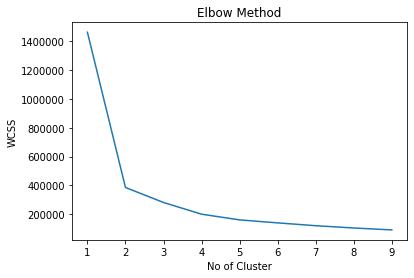

In [104]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel("No of Cluster")
plt.ylabel('WCSS')
plt.show()

### So here no of clusters are decided as 2

# Applying K-means clustering

In [117]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=30)
y_kmeans = kmeans.fit_predict(x)

In [118]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

# Making scatter-plot of clusters

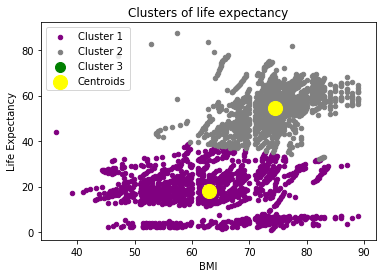

In [119]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'grey', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label='Centroids')
plt.title('Clusters of life expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

## Results

### Here we analysed that we have two clusters in our set. <br>Cluster 1: Countries having high citizens with good BMI have High Life Expectancy. <br> Cluster 2: Countries having citiens with low BMI have Low Life Expectancy , it means that the people which are undernourished , have low LE.<br> It signifies that Life Expectancy depends significantly on BMI as well.
